<a href="https://colab.research.google.com/github/PatronesGrupo4/Grupo4/blob/main/Challenges/Avance_Sergio_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge 1 | Visualización y pre-procesamiento de datos}$$

Integrantes: Sergio Moreno, Alonso Moran

#Analisis exploratorio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df_cancer = pd.read_csv('/content/drive/MyDrive/Reconocimiento de patrones/Semana 2/Challenge/cancer_challenge_cl2.csv', index_col=0)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,-1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
print(df_cancer.info())
df_cancer.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              567 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           564 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      562 non-null    float64
 8   mean symmetry            566 non-null    float64
 9   mean fractal dimension   561 non-null    float64
 10  radius error             564 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,567.000000,569.000000,564.000000,569.000000,569.000000,569.000000,569.000000,562.000000,566.000000,561.000000,...,569.000000,564.000000,569.000000,566.000000,569.000000,564.000000,565.000000,563.000000,562.000000,563.000000
mean,15.293573,19.434938,92.199947,650.421265,0.245386,0.104341,0.088799,0.191178,0.281227,0.142858,...,25.603146,107.377819,880.583128,0.132362,2.844961,0.273048,0.135599,0.290270,0.084044,0.632327
std,27.600997,5.445044,24.280344,359.317697,2.516184,0.052813,0.079720,3.372755,1.713647,1.897265,...,6.436019,33.722701,569.356993,0.022869,39.677091,0.209031,0.504349,0.062084,0.018120,0.518161
min,6.981000,9.710000,43.790000,-1001.000000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,-20.000000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.710000,16.170000,75.412500,418.700000,0.086370,0.064920,0.029560,0.020362,0.161925,0.057690,...,21.060000,84.102500,515.300000,0.116600,0.147700,0.115925,0.064130,0.250450,0.071827,0.000000
50%,13.400000,18.870000,86.545000,546.300000,0.095920,0.092630,0.061540,0.033600,0.179350,0.061480,...,25.410000,97.745000,686.500000,0.131300,0.215600,0.227450,0.099750,0.282300,0.080075,1.000000
75%,15.935000,21.810000,104.400000,782.600000,0.105400,0.130400,0.130700,0.074030,0.195700,0.066080,...,29.720000,126.000000,1084.000000,0.146000,0.341600,0.385300,0.162500,0.318150,0.092105,1.000000
max,666.000000,99.000000,188.500000,2501.000000,45.000000,0.345400,0.426800,80.000000,34.000000,45.000000,...,49.540000,251.200000,4254.000000,0.222600,666.000000,1.252000,12.000000,0.663800,0.207500,5.000000


Evaluamos si la data esta balanceada para el target propuesto.

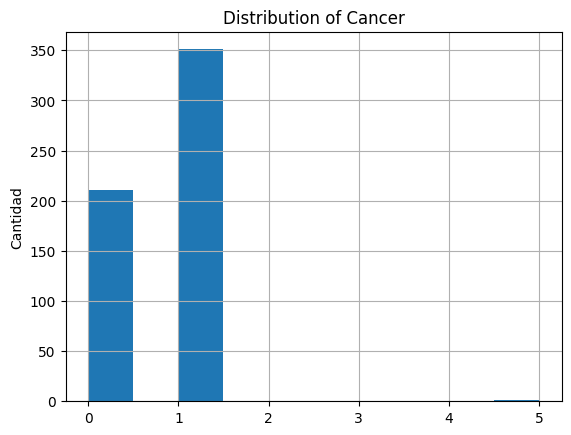

In [ ]:
plt.hist(df_cancer['target'])
plt.title(('Distribution of' + ' Cancer'))
plt.ylabel("Cantidad")
plt.grid()
plt.show()

Podemos ver que hay una disparidad moderada entre la cantidad de positivos a cancer y negativos, lo que puede ser un problema si pasamos esa data a un modelo de clasificacion mas adelante. Ademas vemos un outlier en el valor de 5 que tendremos que eliminar

#Visualizacion de los datos

**Para visualizar outliers: boxplot**

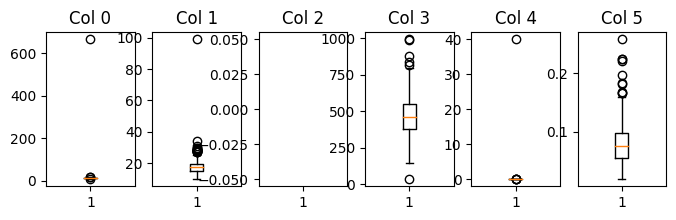

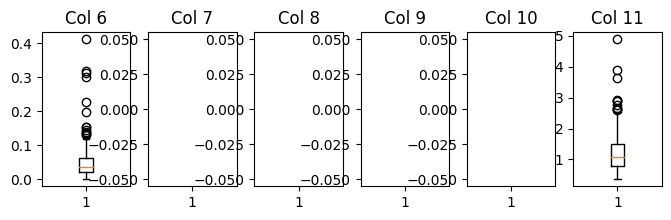

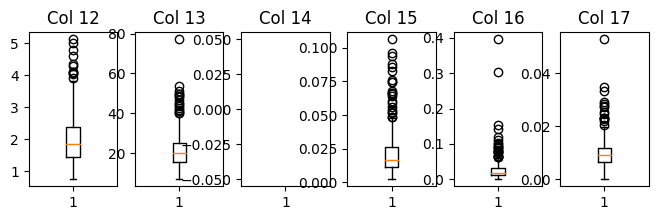

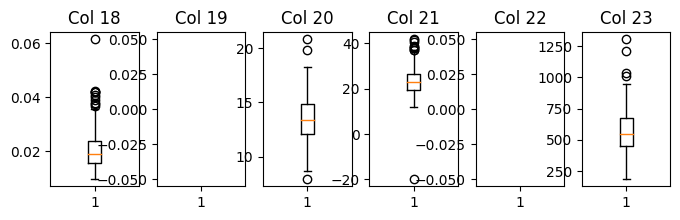

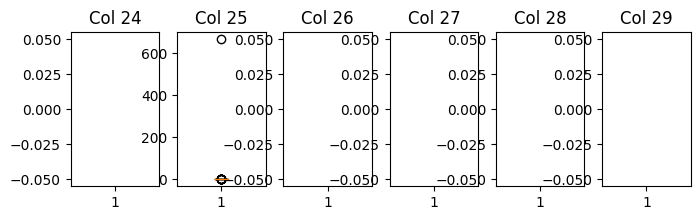

In [ ]:
column_names = df_cancer.columns.tolist()
positive_target = df_cancer[df_cancer['target'] == 1]

fig,axs = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs2 = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs3 = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs4 = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs5 = plt.subplots(1, 6, figsize = (8, 2))

count = 0
for feature in column_names[0:6]:
  axs[count].boxplot(positive_target[feature])
  axs[count].set_title(('Col ' + str(count)))
  count+=1

count = 0
for feature in column_names[6:12]:
  axs2[count].boxplot(positive_target[feature])
  axs2[count].set_title(('Col ' + str(count + 6)))
  count+=1

count = 0
for feature in column_names[12:18]:
  axs3[count].boxplot(positive_target[feature])
  axs3[count].set_title(('Col ' + str(count + 12)))
  count+=1

count = 0
for feature in column_names[18:24]:
  axs4[count].boxplot(positive_target[feature])
  axs4[count].set_title(('Col ' + str(count + 18)))
  count+=1

count = 0
for feature in column_names[24:30]:
  axs5[count].boxplot(positive_target[feature])
  axs5[count].set_title(('Col ' + str(count + 24)))
  count+=1

plt.show()

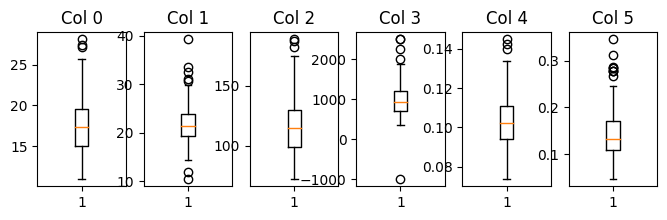

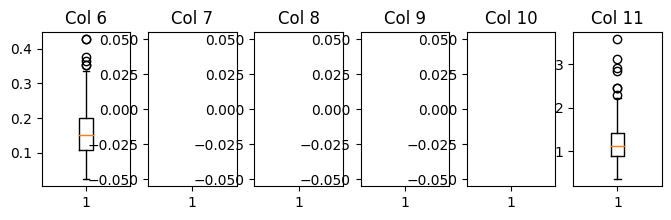

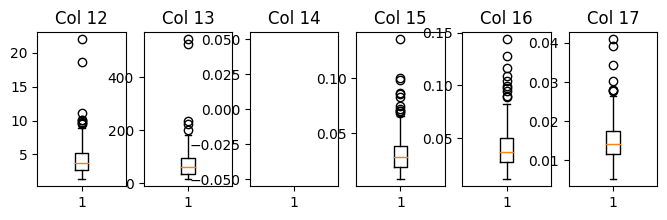

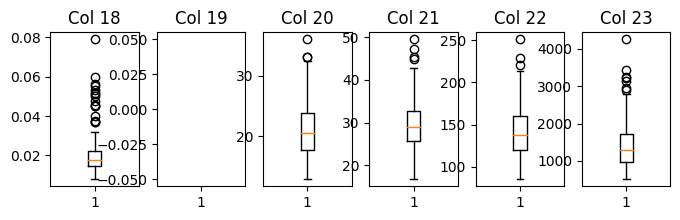

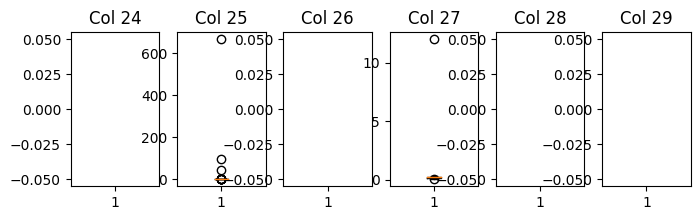

In [ ]:
column_names = df_cancer.columns.tolist()
positive_target = df_cancer[df_cancer['target'] == 0]

fig,axs = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs2 = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs3 = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs4 = plt.subplots(1, 6, figsize = (8, 2))
fig2,axs5 = plt.subplots(1, 6, figsize = (8, 2))

count = 0
for feature in column_names[0:6]:
  axs[count].boxplot(positive_target[feature])
  axs[count].set_title(('Col ' + str(count)))
  count+=1

count = 0
for feature in column_names[6:12]:
  axs2[count].boxplot(positive_target[feature])
  axs2[count].set_title(('Col ' + str(count + 6)))
  count+=1

count = 0
for feature in column_names[12:18]:
  axs3[count].boxplot(positive_target[feature])
  axs3[count].set_title(('Col ' + str(count + 12)))
  count+=1

count = 0
for feature in column_names[18:24]:
  axs4[count].boxplot(positive_target[feature])
  axs4[count].set_title(('Col ' + str(count + 18)))
  count+=1

count = 0
for feature in column_names[24:30]:
  axs5[count].boxplot(positive_target[feature])
  axs5[count].set_title(('Col ' + str(count + 24)))
  count+=1

plt.show()

#Imputacion de valores NaN

La imputacion con la mediana puede ser una estrategia razonable en muchos casos. La mediana es menos sensible a valores atípicos en comparación con la media, lo que puede hacer que sea una opción más robusta en situaciones donde tienes outliers o datos dispersos.

In [ ]:
df_cancer_imputed = df_cancer.fillna(df_cancer.median())
print(df_cancer.info(), "\n")
print(df_cancer_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              567 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           564 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      562 non-null    float64
 8   mean symmetry            566 non-null    float64
 9   mean fractal dimension   561 non-null    float64
 10  radius error             564 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#Eliminar outliers